In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows',None)
#pd.set_option('display.max_columns',None)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [2]:
df = pd.read_csv("titanic-training-data.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
561,562,0,3,"Sivic, Mr. Husein",male,40.0,0,0,349251,7.8958,NaN,S


In [8]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
593,594,0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q
646,647,0,3,"Cor, Mr. Liudevit",male,19.0,0,0,349231,7.8958,NaN,S
484,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.2500,NaN,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
688,689,0,3,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,NaN,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S


In [9]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [16]:
#df.index=np.arange(891,0,-1) --> to change the index from (0 to 891) to (891 to 0)

In [17]:
df1 = df

In [18]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:xlabel='Pclass', ylabel='count'>

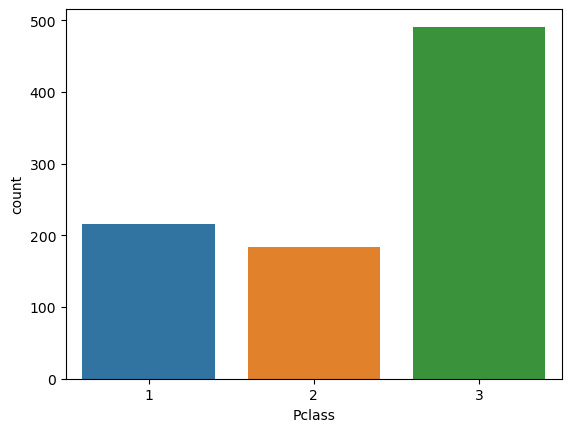

In [19]:
sns.countplot(x='Pclass',data=df) # for singl ecategorical data

<AxesSubplot:xlabel='Sex', ylabel='count'>

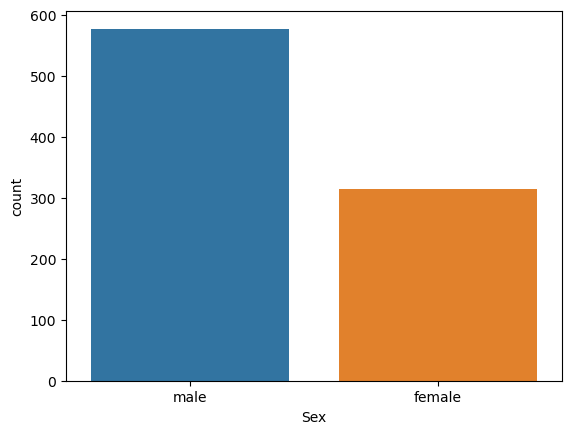

In [20]:
sns.countplot(x='Sex',data=df) # for single categorical data

<AxesSubplot:xlabel='Embarked', ylabel='count'>

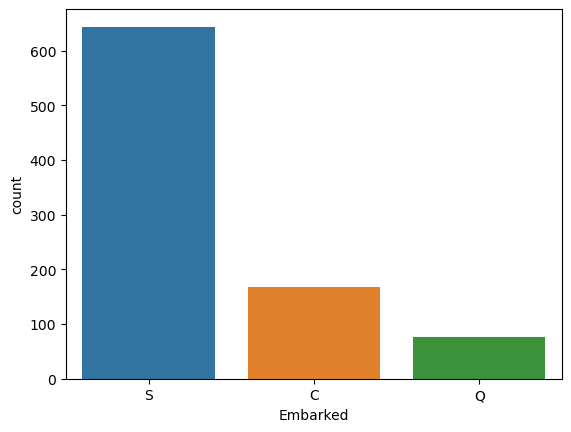

In [21]:
sns.countplot(x='Embarked',data=df) # for single categorical data

<AxesSubplot:xlabel='Survived', ylabel='count'>

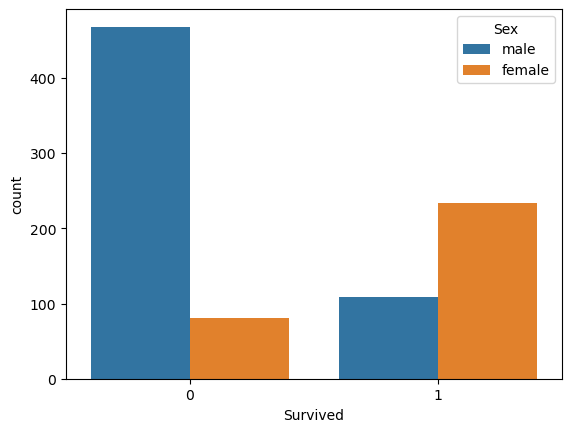

In [22]:
sns.countplot(x='Survived',hue='Sex',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

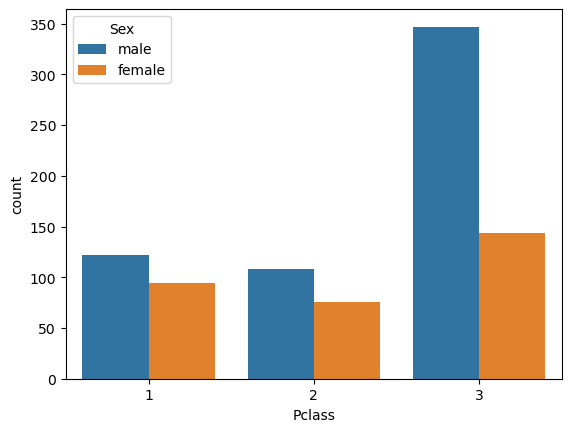

In [23]:
sns.countplot(x='Pclass',hue='Sex',data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

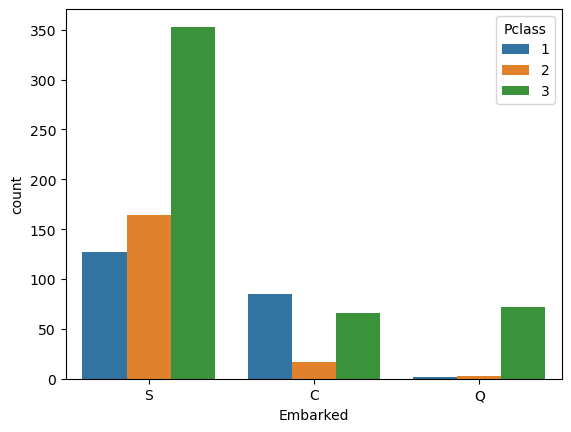

In [24]:
sns.countplot(x='Embarked',hue='Pclass',data=df)

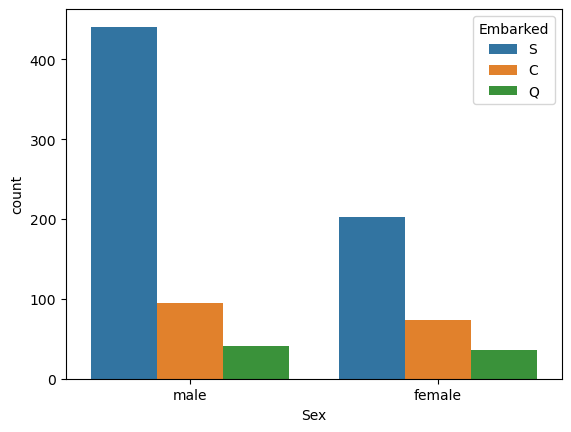

In [25]:
sns.countplot(x='Sex',hue='Embarked',data=df)
plt.show()

#### Univariate(single attribute -- numerical)

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

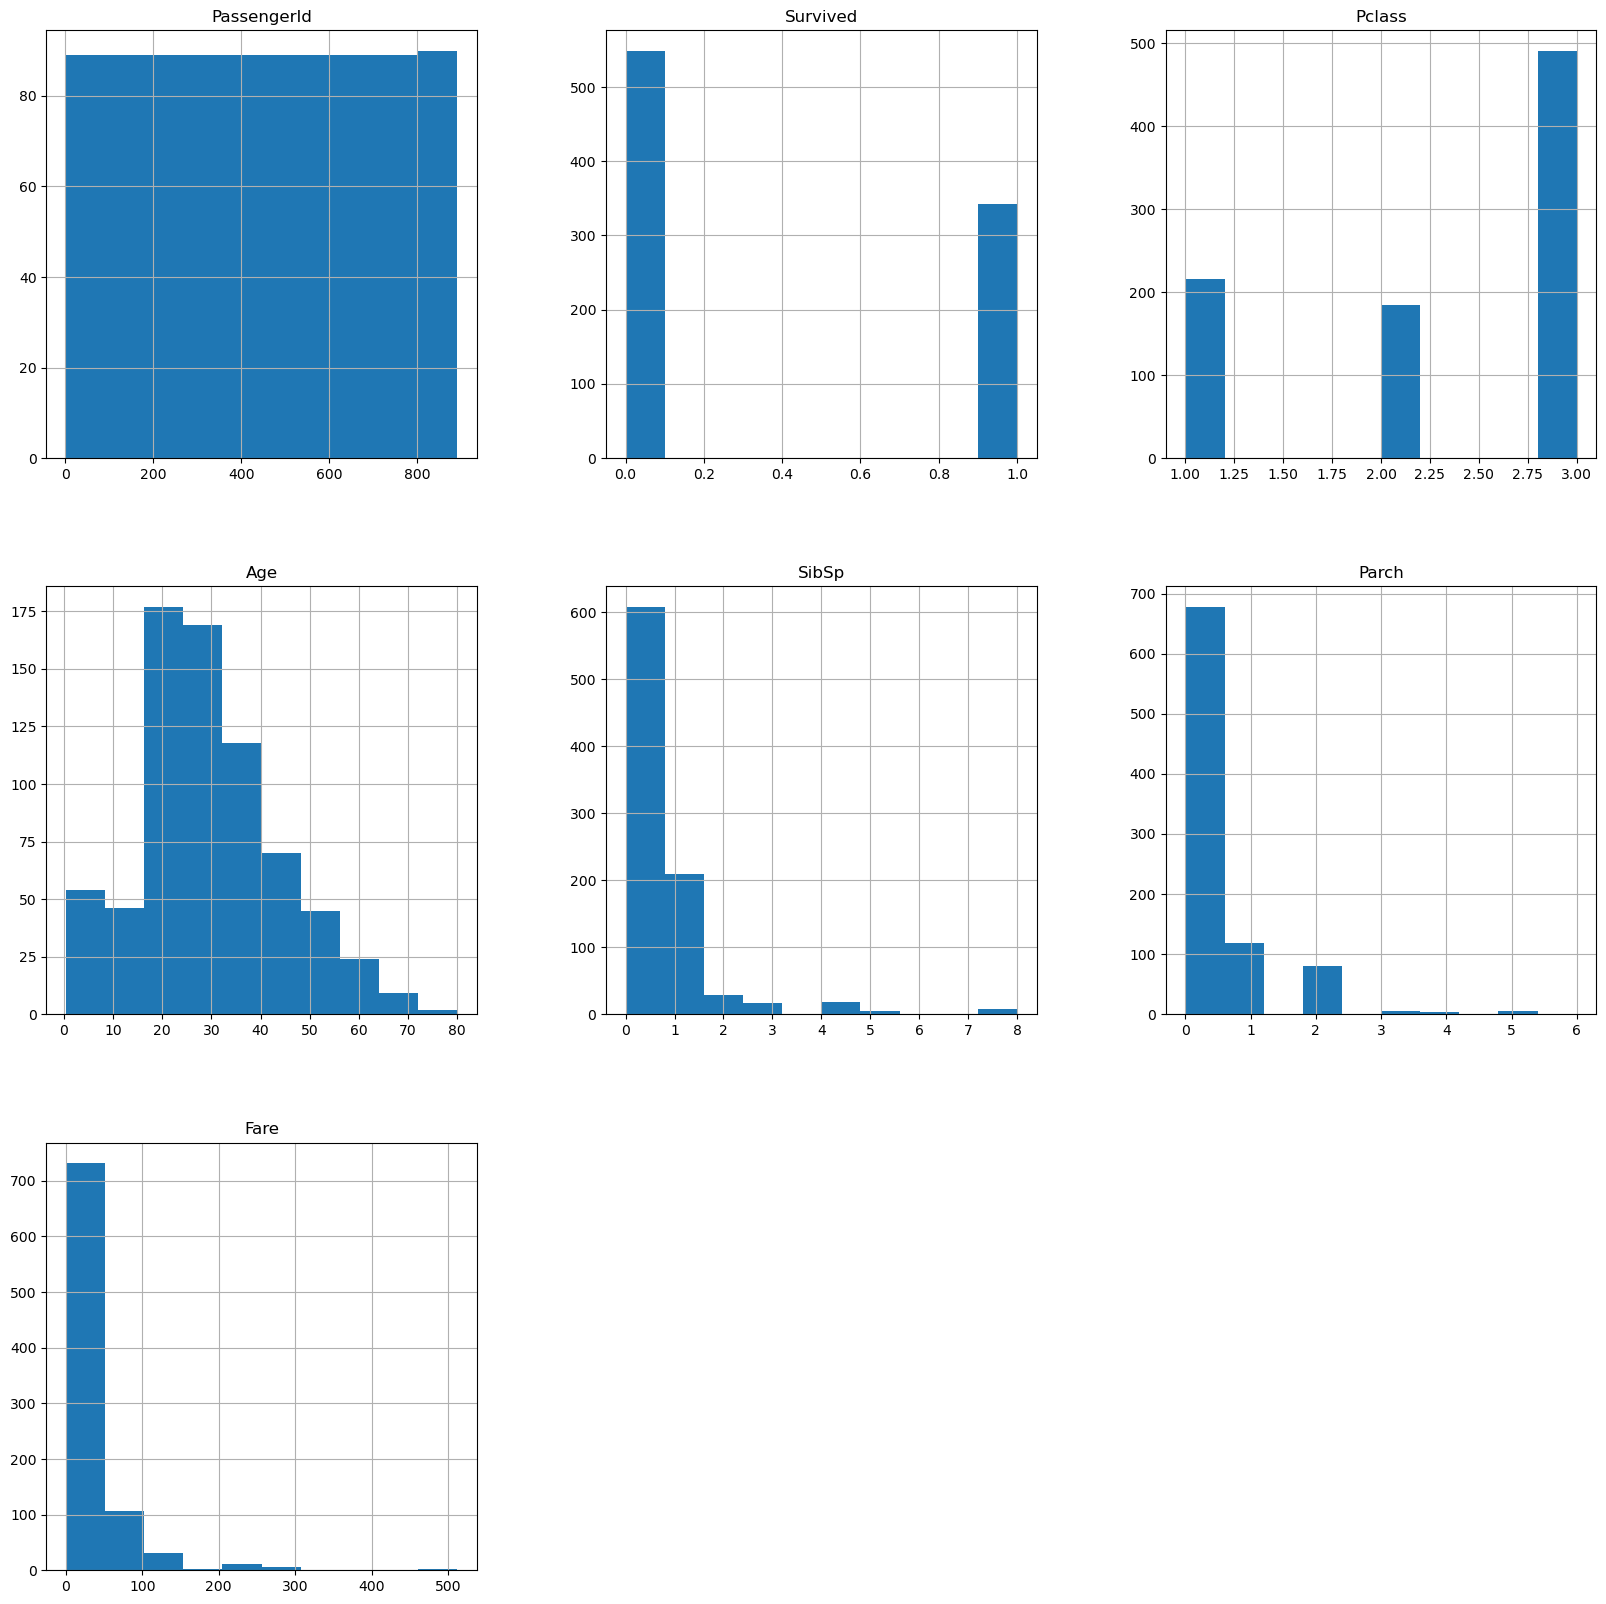

In [26]:
df.hist(figsize=(20,20))

<AxesSubplot:xlabel='Age', ylabel='Density'>

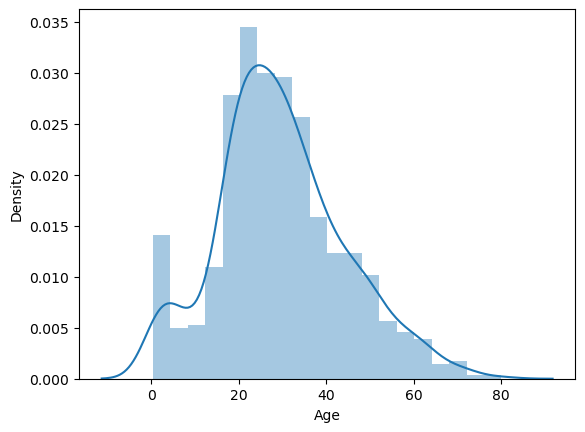

In [27]:
sns.distplot(df['Age'])

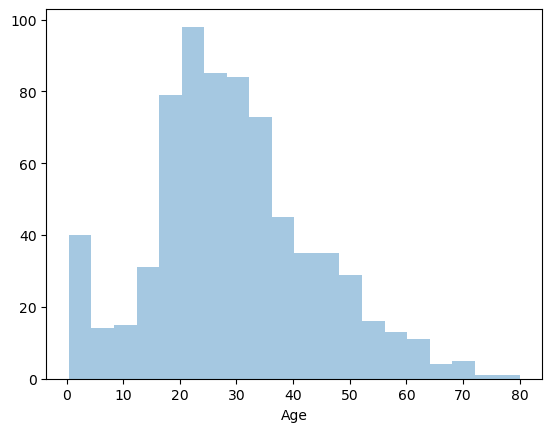

In [28]:
sns.distplot(df['Age'],kde=False)
plt.show()

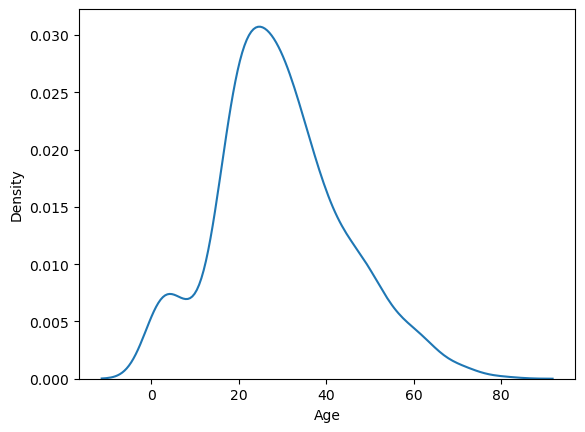

In [29]:
sns.distplot(df['Age'],hist=False)
plt.show()

# One categorical and one numerical 

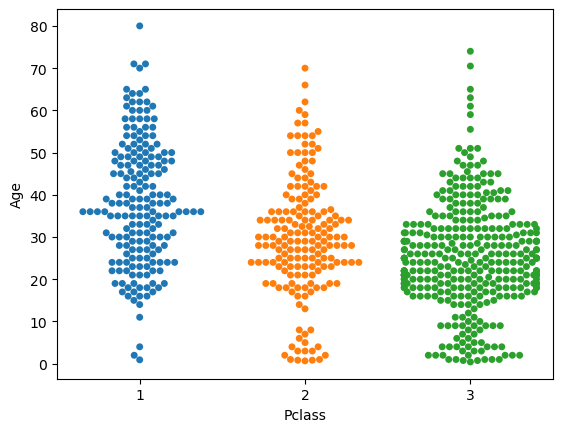

In [30]:
sns.swarmplot(x='Pclass',y='Age',data=df)
plt.show()

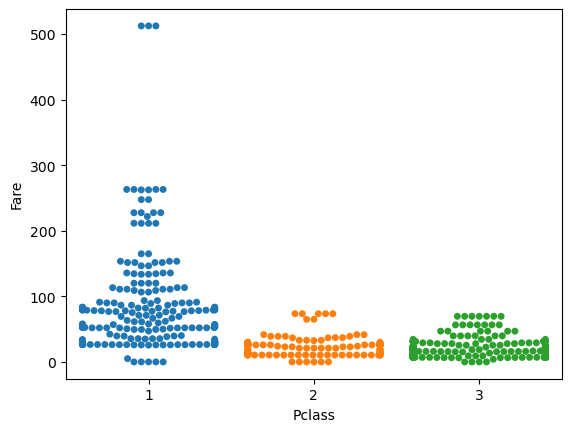

In [31]:
sns.swarmplot(x='Pclass',y='Fare',data=df)
plt.show()

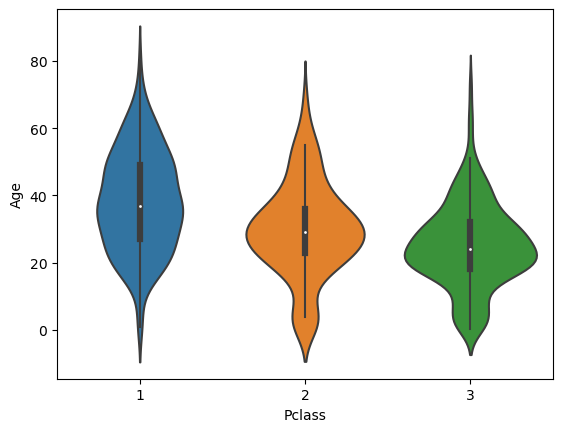

In [32]:
sns.violinplot(x='Pclass',y='Age',data=df)
plt.show()

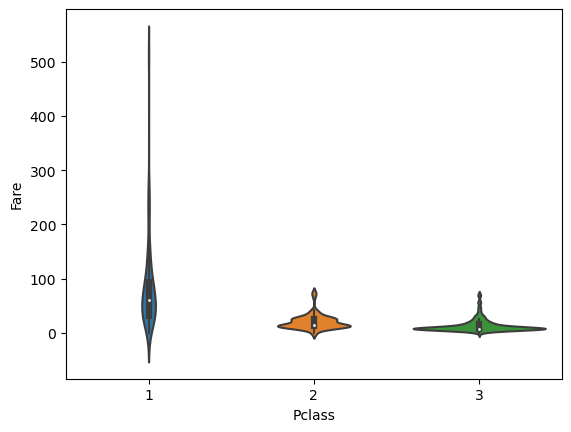

In [33]:
sns.violinplot(x='Pclass',y='Fare',data=df)
plt.show()

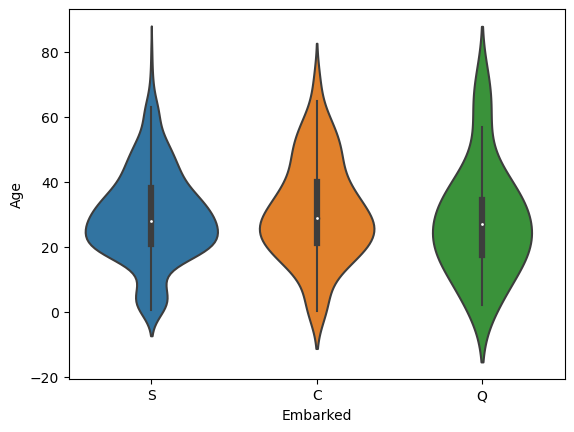

In [34]:
sns.violinplot(x='Embarked',y='Age',data=df)
plt.show()

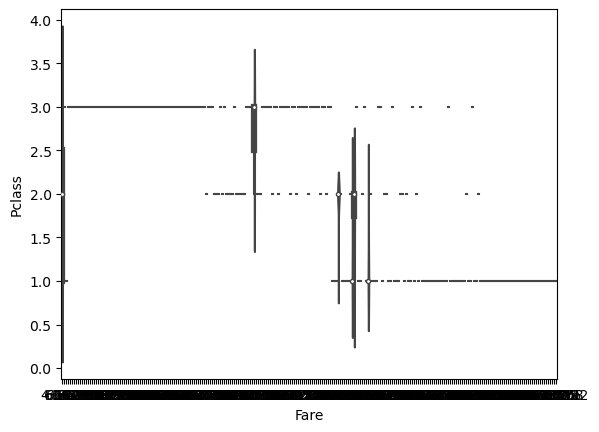

In [35]:
sns.violinplot(y='Pclass',x='Fare',data=df)
plt.show()

* That is why should not take the object type in y-axis and numericals types(int,float) in x-axis *

# Two numerical and one categorical

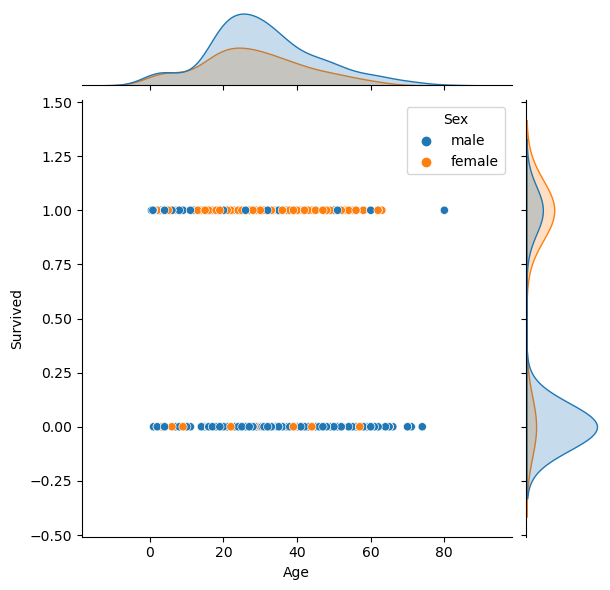

In [36]:
sns.jointplot(x='Age',y='Survived',hue='Sex',data=df)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


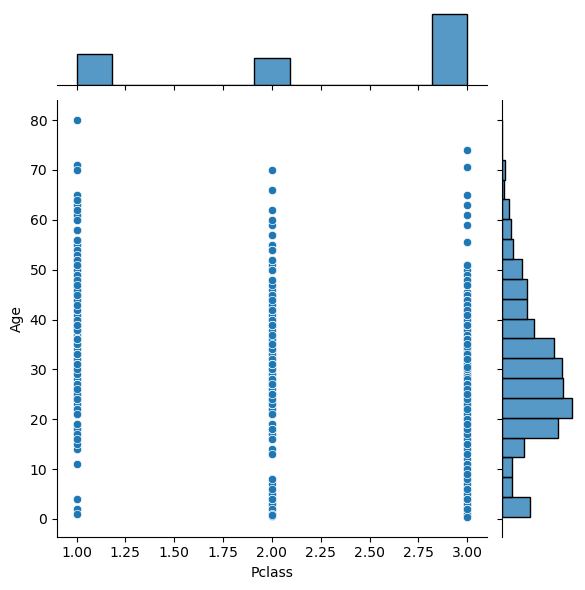

In [38]:
sns.jointplot(x='Pclass',y='Age',data=df)

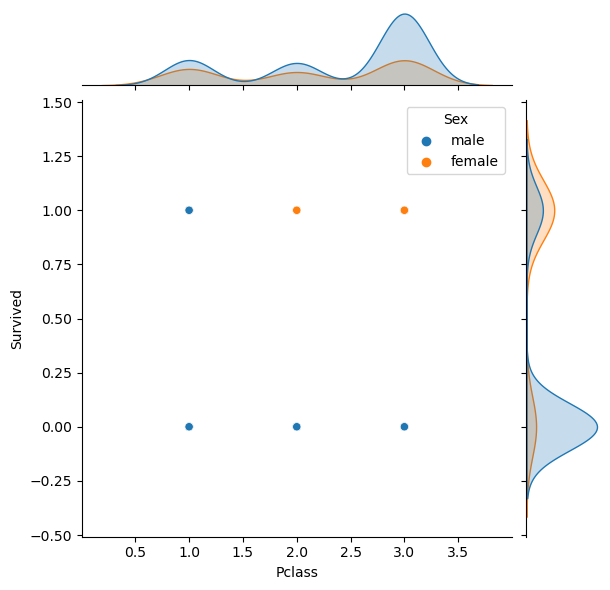

In [39]:
sns.jointplot(x='Pclass',y='Survived',hue='Sex',data=df)

Text(0.5, 1.0, 'Sex vs Age')

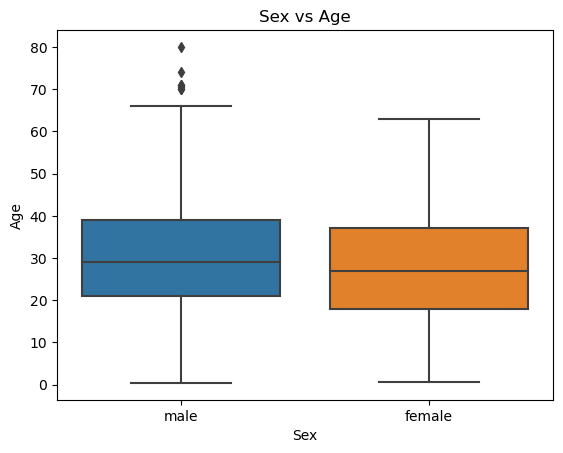

In [40]:
sns.boxplot(x='Sex',y="Age",data=df) # one categorical and one numerical
plt.title('Sex vs Age')

<AxesSubplot:xlabel='Age', ylabel='Embarked'>

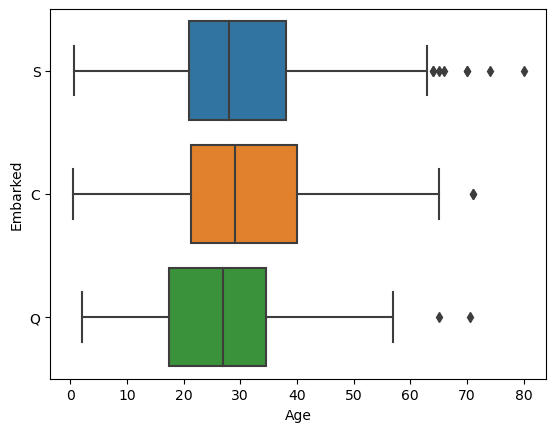

In [41]:
sns.boxplot(x='Age',y='Embarked',data=df)

Text(0.5, 1.0, 'Sex vs Pclass')

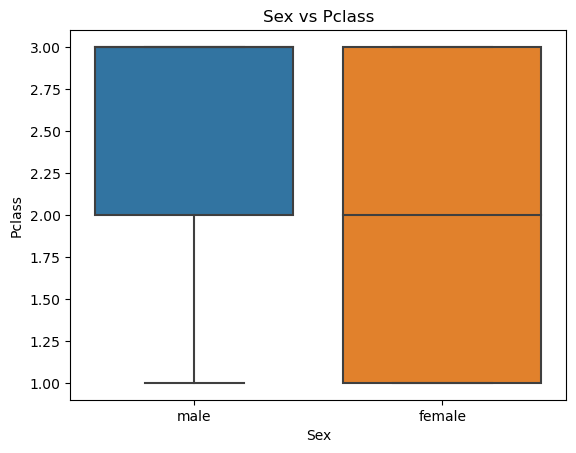

In [42]:
sns.boxplot(x='Sex',y='Pclass',data=df)
plt.title('Sex vs Pclass')

Text(0.5, 1.0, 'Sex vs Age')

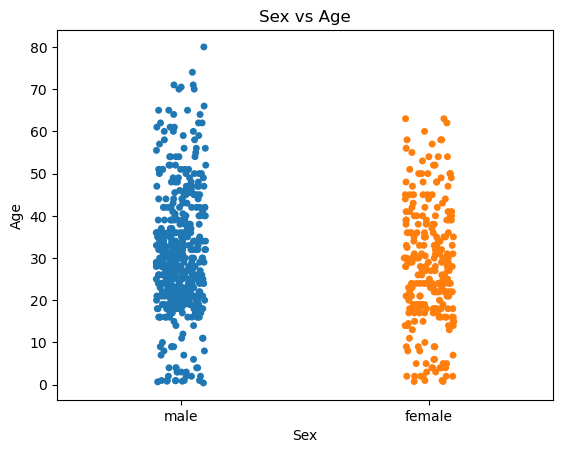

In [43]:
sns.stripplot(x='Sex',y="Age",data=df)
plt.title('Sex vs Age')

Text(0.5, 1.0, 'Sex vs Age')

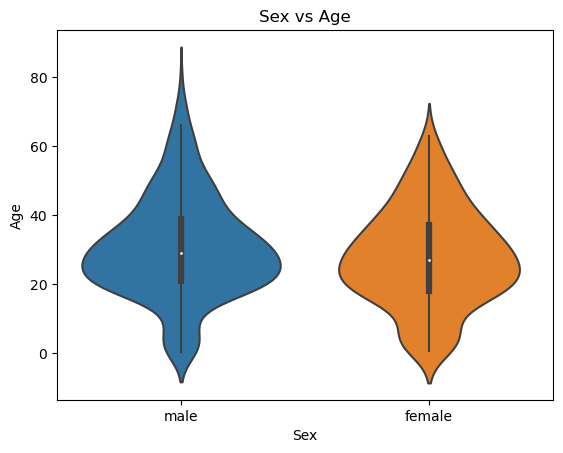

In [44]:
sns.violinplot(x='Sex',y="Age",data=df)
plt.title('Sex vs Age')

Text(0.5, 1.0, 'Sex vs Age')

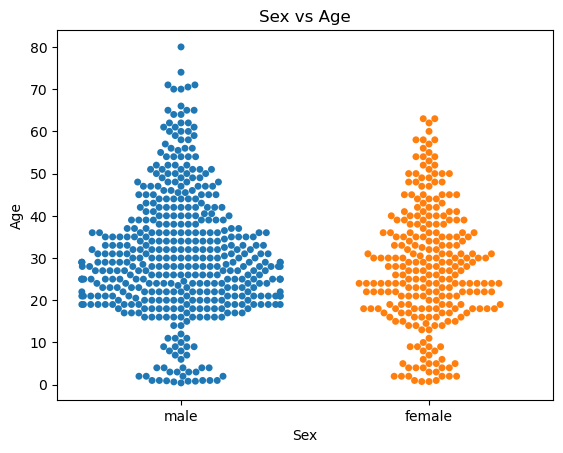

In [45]:
sns.swarmplot(x='Sex',y="Age",data=df)
plt.title('Sex vs Age')

Text(0.5, 1.0, 'Sex vs Age')

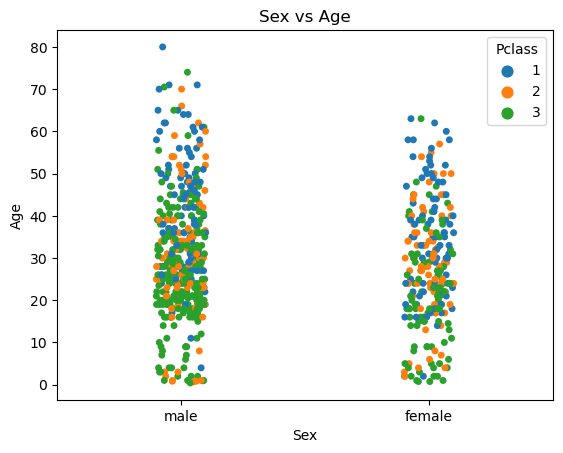

In [46]:
sns.stripplot(x='Sex',y="Age",hue='Pclass',data=df)
plt.title('Sex vs Age')

Text(0.5, 1.0, 'Sex vs Age')

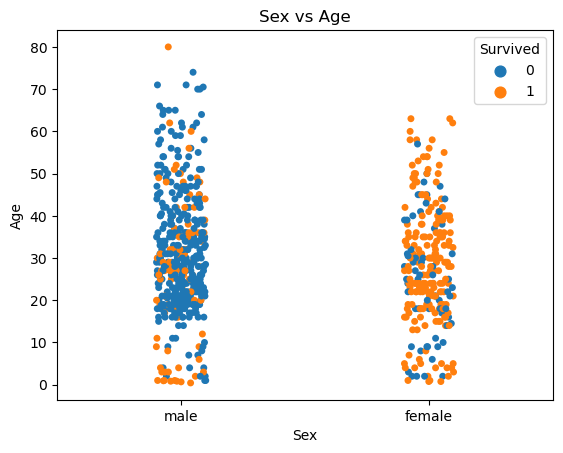

In [47]:
sns.stripplot(x='Sex',y="Age",hue='Survived',data=df)
plt.title('Sex vs Age')

<AxesSubplot:>

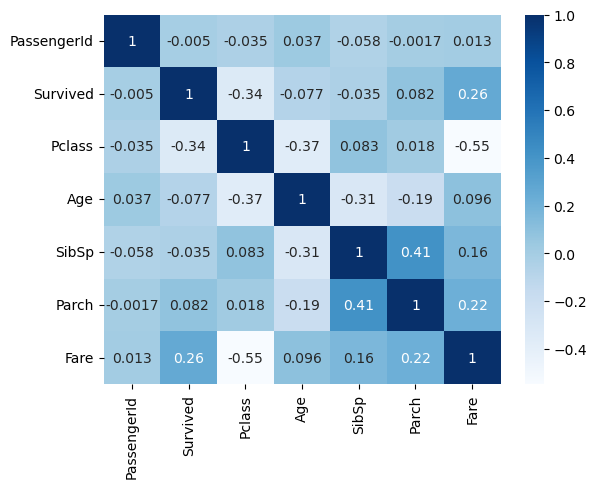

In [48]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [49]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
median1 = df['Age'].median()
median1

28.0

In [51]:
df['Age']= df['Age'].replace(np.nan,median1) 
# replacing the missing values present in the age column by the median values

In [52]:
mode1=df['Embarked'].mode()# it shows the no. of modes present in the data
mode1

0    S
Name: Embarked, dtype: object

In [53]:
md=df['Embarked'].mode().values[0] # we have taken the first value from the mode 
md

'S'

In [54]:
df['Embarked'] = df['Embarked'].replace(np.nan,md)

In [55]:
df.duplicated().sum() # to check the no. of duplicated data

0

In [56]:
df.drop_duplicates() # to drop the duplicated values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# To remove the outliers

<AxesSubplot:xlabel='Age'>

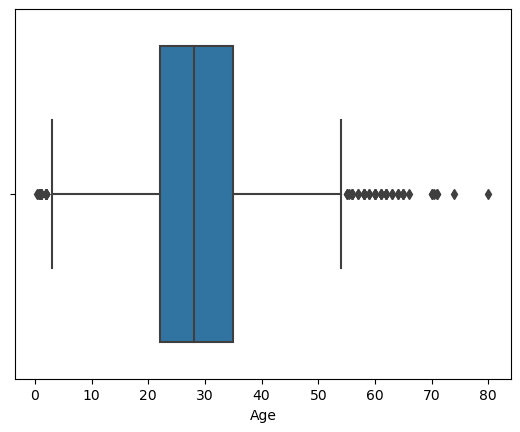

In [57]:
sns.boxplot(x='Age',data=df)

In [58]:
def rmv_outliers(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    iqr = q3 - q1
    lower_rng = q1 - 1.5*iqr
    upper_rng = q3 + 1.5*iqr
    return lower_rng , upper_rng

In [59]:
lowage, uppage = rmv_outliers(df['Age'])
df['Age'] = np.where(df['Age'] > uppage , uppage , df['Age'])
df['Age'] = np.where(df['Age'] < lowage , lowage , df['Age'])

<AxesSubplot:xlabel='Age'>

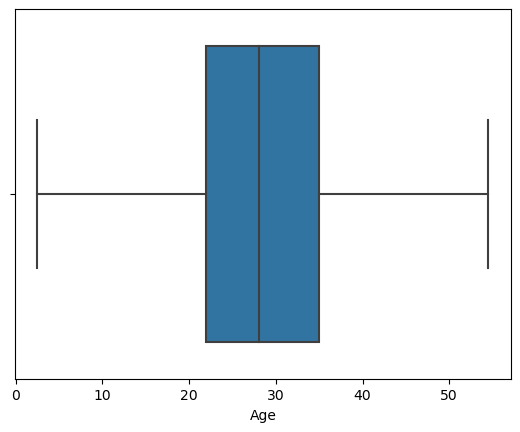

In [60]:
sns.boxplot(x='Age',data=df)

In [61]:
df.shape

(891, 12)

In [62]:
df = pd.get_dummies(df,columns=['Sex','Embarked','Pclass'])

In [63]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1


In [64]:
df.shape

(891, 17)

In [65]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.039282,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.725028,0.242424,0.206510,0.551066
std,257.353842,0.486592,12.072074,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.446751,0.428790,0.405028,0.497665
min,1.000000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,54.500000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
df.isnull().sum()

PassengerId      0
Survived         0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Pclass_1         0
Pclass_2         0
Pclass_3         0
dtype: int64

In [67]:
df= df.drop(['PassengerId','Name','Ticket','Cabin','Fare'],axis=1)

In [68]:
df.head()

,Survived,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,1,0,0,1,0,0
2,1,26.0,0,0,1,0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,0,1,1,0,0
4,0,35.0,0,0,0,1,0,0,1,0,0,1


In [69]:
df.dtypes

Survived        int64
Age           float64
SibSp           int64
Parch           int64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
Pclass_1        uint8
Pclass_2        uint8
Pclass_3        uint8
dtype: object

In [70]:
x=df.drop('Survived',axis=1)#independent variable
y=df["Survived"]# dependent variable

# in x-axis, except survived column all other columns are there and in y-axis, survived column is there

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

### LogisticRegression

In [72]:
model_1 = LogisticRegression(solver='lbfgs')
model_1.fit(x_train,y_train)
model_1

LogisticRegression()

In [73]:
model_1.score(x_train,y_train)

0.8138041733547352

In [74]:
model_1.score(x_test,y_test)

0.7798507462686567

In [75]:
df.isnull().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

In [76]:
poly = PolynomialFeatures(degree=2,interaction_only=True)

x_train1 = poly.fit_transform(x_train)
x_test1 = poly.fit_transform(x_test)

poly_clf = linear_model.LogisticRegression()
poly_clf.fit(x_train1,y_train)

y_pred = poly_clf.predict(x_test1)

print(poly_clf.score(x_train1,y_train))
print(poly_clf.score(x_test1,y_test))

0.8619582664526485
0.7947761194029851


In [77]:
pred = model_1.predict(x_test)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)
#accuracy_score(y_test,y_pred)

0.7798507462686567

### Confusion Metrix

In [79]:
from sklearn import metrics
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       153
           1       0.78      0.68      0.73       115

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [80]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))
"""
	the confusion metrix will in the form of 
    	prediction  TP - true positive(model predicts true and in actual it is true)
           0   1    FP - false positive(model predicts true but in actual it is false)
actual 0 [TN, FP]   FN - false negative(model predicts false but in actual it is true)
       1 [FN, TP]   TN - true negative(model predicts false and in actual it is false)
"""

[[131  22]
 [ 37  78]]


'\n\tthe confusion metrix will in the form of \n    \tprediction  TP - true positive(model predicts true and in actual it is true)\n           0   1    FP - false positive(model predicts true but in actual it is false)\nactual 0 [TN, FP]   FN - false negative(model predicts false but in actual it is true)\n       1 [FN, TP]   TN - true negative(model predicts false and in actual it is false)\n'

<AxesSubplot:>

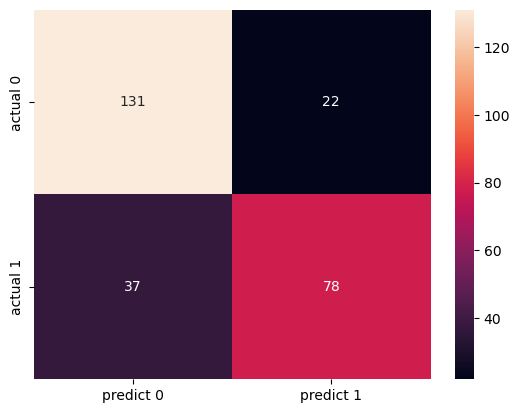

In [81]:
cm = confusion_matrix(y_test,pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in ['actual 0','actual 1']], columns=[j for j in ['predict 0','predict 1']])

sns.heatmap(df_cm,annot=True,fmt='g')

### Decision tree Model

In [82]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#Decision tree moel is an overfit model which works well in train data but not in test data.
#To avoid the overfit problem, we will control the max_depth

In [83]:
model2 = DecisionTreeClassifier(max_depth=3.5)
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3.5)

In [84]:
print("Efficiency is train data is ",model2.score(x_train,y_train))
print("Efficiency in test data is ",model2.score(x_test,y_test))
#to get a good model, the difference b/w two model should be less than or equal to 5%

Efficiency is train data is  0.8571428571428571
Efficiency in test data is  0.7723880597014925


### Bagging regression Model

In [85]:
from sklearn.ensemble import BaggingClassifier
model3 = BaggingClassifier(n_estimators=10, base_estimator=model_1)

In [86]:
model3.fit(x_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression())

In [87]:
model3.score(x_train,y_train)

0.812199036918138

In [88]:
model3.score(x_test,y_test)

0.7798507462686567

### Boost Classifier Model

In [89]:
from sklearn.ensemble import AdaBoostClassifier
model4 = AdaBoostClassifier(n_estimators=20)
model4.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=20)

In [90]:
model4.score(x_train,y_train)

0.8330658105939005

In [91]:
model4.score(x_test,y_test)

0.7835820895522388

### GradientBoosting Classifier Model

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = AdaBoostClassifier(n_estimators=20)
model5.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=20)

In [93]:
model5.score(x_train,y_train)

0.8330658105939005

In [94]:
model5.score(x_test,y_test)

0.7835820895522388

### Random Forest classifier Model

In [95]:
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(n_estimators=25, max_depth=3,max_samples=18)
model6.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, max_samples=18, n_estimators=25)

In [96]:
model6.score(x_train,y_train)

0.8298555377207063

In [97]:
model6.score(x_test,y_test)

0.753731343283582

### Support Vector Machine model

In [98]:
from sklearn.svm import SVC
#model7 = SVC(max_iter=5)
model7 = SVC(C=1.0,kernel='rbf',gamma='auto',degree=4)
model7.fit(x_train,y_train)

SVC(degree=4, gamma='auto')

In [99]:
model7.score(x_train,y_train)

0.8571428571428571

In [100]:
model7.score(x_test,y_test)

0.7835820895522388